# 미션2_2팀_정수범

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/스터디/hotel_data_modified_mission.csv')
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# matplotib에서 한글폰트 깨짐 현상에 대한 코딩
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and direc

---------------------------
# 데이터 확인

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,394.0,NaN,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,9.0,NaN,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,9.0,NaN,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,89.0,NaN,0,0,0,Check-Out,2017-09-07


In [ ]:
# 컬럼별 정보 확인 (object, int64, float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

| 컬럼명               | 설명                        | 데이터 타입 예시                                          |
| ----------------- | ------------------------- | -------------------------------------------------- |
| **Order ID**      | 주문 고유 식별자                 | 문자열 (`CA-2016-152156`)                             |
| **Order Date**    | 주문일                       | 문자열(날짜 형식)                                         |
| **Ship Date**     | 배송일                       | 문자열(날짜 형식)                                         |
| **Ship Mode**     | 배송 방식                     | 범주형 (`Second Class`, `Standard Class` 등)           |
| **Customer ID**   | 고객 고유 식별자                 | 문자열                                                |
| **Segment**       | 고객 세그먼트                   | 범주형 (`Consumer`, `Corporate`, `Home Office`)       |
| **Country**       | 국가명 (대부분 `United States`) | 문자열                                                |
| **City**          | 도시명                       | 문자열                                                |
| **State**         | 주(State)                  | 문자열                                                |
| **Postal Code**   | 우편번호                      | 숫자 또는 문자열                                          |
| **Region**        | 지역 구분                     | 범주형 (`East`, `West`, `Central`, `South`)           |
| **Product ID**    | 상품 고유 식별자                 | 문자열                                                |
| **Category**      | 상품 대분류                    | 범주형 (`Furniture`, `Office Supplies`, `Technology`) |
| **Sub-Category**  | 상품 소분류                    | 범주형 (`Chairs`, `Binders`, `Phones` 등)              |
| **Product Name**  | 상품명                       | 문자열                                                |
| **Sales**         | 매출액                       | 수치형 (float)                                        |
| **Quantity**      | 수량                        | 정수형                                                |
| **Discount**      | 할인율                       | float (0.0 \~ 1.0)                                 |
| **Profit**        | 이익액                       | float (음수 가능 — 손실 발생 시)                            |

In [ ]:
# desctibe()으로 최소값, 최대값, 평균값 등을 통해 이상치 여부 확인
df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,10,12,NaN,NaN,NaN,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,A,A,NaN,NaN,NaN,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,85994,74053,NaN,NaN,NaN,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,NaN,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,NaN,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,NaN,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,NaN,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,NaN,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000,NaN,NaN


In [ ]:
# isnull()로 컬럼별 결측치 확인
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


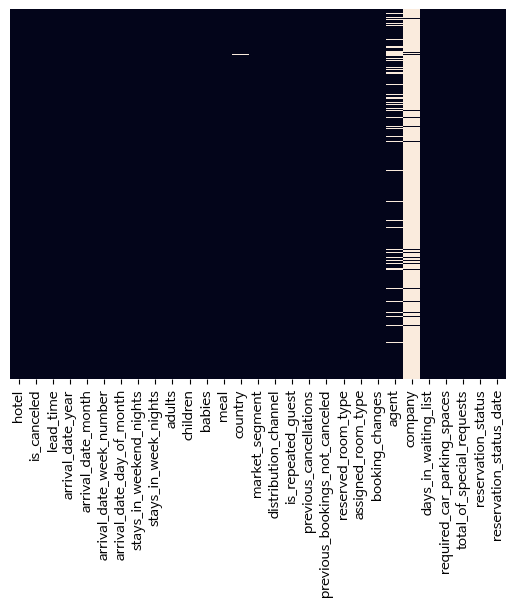

In [ ]:
# 결측치 히트맵 보기
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.show()

---------------------
# 전처리

## 결측치 확인 및 처리

#### children, country, agent, company에 결측치 확인됨

---------------------
- children의 결측치는 아이가 없다는 것으로 판단하여 0의로 대체
- country의 결측치는 국가를 지정할 수 없거나 오류로 판단하여 'Undefined'로 대체
- agent 결측치 최빈값 으로 대체
- company 결측치 평균값 대체

(agent, company 데이터는 사용에 불필요하다고 판다하여 테스트 겸 최빈값, 평균값 연습)

In [ ]:
# 결측치 처리 - 최빈값, 평균값
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Undefined')
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])
df['company'] = df['company'].fillna(df['company'].mean())

In [ ]:
# isnull()로 컬럼별 결측치 확인
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


---------------------------
## 이상치 확인 및 처리

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.060080,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,106.323205,31.411012,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,189.266735,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000


이상치로 의심되는 부분
- adults, children, babies

1. adults

    Q. MAX값 55 : 성인 55명이 한번에 예약하여 이용이 가능한가?
    
    A. 주관적인 생각으로는 불가능으로 보이지만 데이터에서 룸사이즈나 형태를 알수 없기때문에 불가능하다고 단정하기 어렵다.
    
    판단. 이상치가 아니라고 판단

2. children/babies

    Q. MAX값 10 : 어린이/유아 10명이 함께 이용가능한가?
    
    A. 성인과 마찬가지로 주관적인 해석이 아닌 주어진 정보로만 판단하였을때 불가능의 사유가 없다.

    **(max값 10의 정보량이 극히 작기때문에 삭제)**

    Q. 다만 어린이/유아가 성인보호자가 없이 호텔에 투숙이 가능한가?

    https://www.korea.kr/multi/visualNewsView.do?newsId=148930496

    판단. 보호자의 숙박동의서가 있다면 가능하다는 국내법령은 있지만 현재 데이터에서는 해외의 사례이기도 하며, 국가별 법령이 다를 수 있다고 판단하여 보호자가 동반하지 않은 데이터를 이상데이터로 간주



In [ ]:
# 예약을 취소하지 않았는데 숙박인원수가 0인경우 이상치로 판단
no_people = df.query('is_canceled==0 and adults==0 and children==0 and babies==0')
no_people[['is_canceled','adults', 'children', 'babies']]

,is_canceled,adults,children,babies
2224,0,0,0.0,0
2409,0,0,0.0,0
3181,0,0,0.0,0
3684,0,0,0.0,0
3708,0,0,0.0,0
...,...,...,...,...
115029,0,0,0.0,0
115091,0,0,0.0,0
116251,0,0,0.0,0
116534,0,0,0.0,0


In [ ]:
# 위에 해당되는 값 삭제 (숙박인원은 0인데 예약을 취소한 경우는 삭제하지 않음 : 숙박인원이 0이기에 취소한것으로 판단)

df_cleaned = df.drop(no_people.index)

In [ ]:
df_cleaned.shape

(119235, 29)

In [ ]:
# adults 0 이고 children 1이상 또는 babies 1이상인 경우 no_adults에 저장
no_adults = df_cleaned.query('adults==0 and (children>=1 or babies>=1)')
no_adults[['adults', 'children', 'babies']]

,adults,children,babies
40984,0,3.0,0
41048,0,2.0,0
41446,0,2.0,0
41952,0,2.0,0
45158,0,2.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


In [ ]:
# adults 0 이고 children 1이상 또는 babies 1이상인 경우를 drop을 통해 삭제하고 df_cleaned로 지정한다

df_cleaned = df_cleaned.drop(no_adults.index)

In [ ]:
df_cleaned.shape

(119012, 29)

In [ ]:
# babies 와 children 의 max값 데이터 수 확인

max_babies = df_cleaned.query('children == 10 or babies==10')
max_babies[['children', 'babies']]

,children,babies
328,10.0,0
46619,0.0,10


In [ ]:
# babies 와 children 의 max값 데이터 수가 매우 작기 때문에 삭제 처리한다

df_cleaned = df_cleaned.drop(max_babies.index)

In [ ]:
df_cleaned.shape

(119010, 29)

In [ ]:
# 테스트 결과 해당 인덱스 삭제됨 확인
test = df_cleaned.query('adults==0 and (children>=1 or babies>=1)')
test[['adults', 'children', 'babies']]

,adults,children,babies


380개의 행이 삭제된 것을 확인할수 있다.

In [ ]:
df.shape

(119390, 29)

In [ ]:
df_cleaned.shape

(119010, 29)

---------------------------
## 중복값 확인 및 처리

In [ ]:
# 중복값 확인
df_cleaned[df_cleaned.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,189.266735,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,A,1,250.0,189.266735,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,E,0,250.0,189.266735,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,D,0,240.0,189.266735,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,A,0,240.0,189.266735,0,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,D,0,9.0,189.266735,0,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,189.266735,0,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,189.266735,0,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,189.266735,0,0,2,Check-Out,2017-09-03


In [ ]:
df_cleaned.duplicated().sum()

np.int64(33093)

In [ ]:
# 중복값 삭제

df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
# 중복값 확인 결과 모두 삭제 됨

df_cleaned.duplicated().sum()

np.int64(0)

---------------------------
## 문자 데이터 가공

- month의 문자열을 숫자형으로 변경
- 년월별 데이터로 보기 위하여 year와 숫자형으로 변경된 month를 결합하여 새로운 column 생성


In [ ]:
df_cleaned['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
# map()함수 사용하여 문자열 데이터 변형
df_cleaned_map ={
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12',
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06'
}
df_cleaned['arrival_date_month_num'] = df_cleaned['arrival_date_month'].map(df_cleaned_map)
df_cleaned[['arrival_date_month','arrival_date_month_num']]

,arrival_date_month,arrival_date_month_num
0,July,07
1,July,07
2,July,07
3,July,07
4,July,07
...,...,...
119385,August,08
119386,August,08
119387,August,08
119388,August,08


In [ ]:
# 새로운 year과 month가 합쳐진 column 만들어주기
# - 오류가 발생됨 ()//https://wikidocs.net/151412 해당 자료 참조

df_cleaned['year_month'] = df_cleaned['arrival_date_year'].astype(str) + df_cleaned['arrival_date_month_num'].astype(str)
df_cleaned['year_month']

,year_month
0,201507
1,201507
2,201507
3,201507
4,201507
...,...
119385,201708
119386,201708
119387,201708
119388,201708


-------------------------
# 데이터 분석

## heatmap 자료 탐구

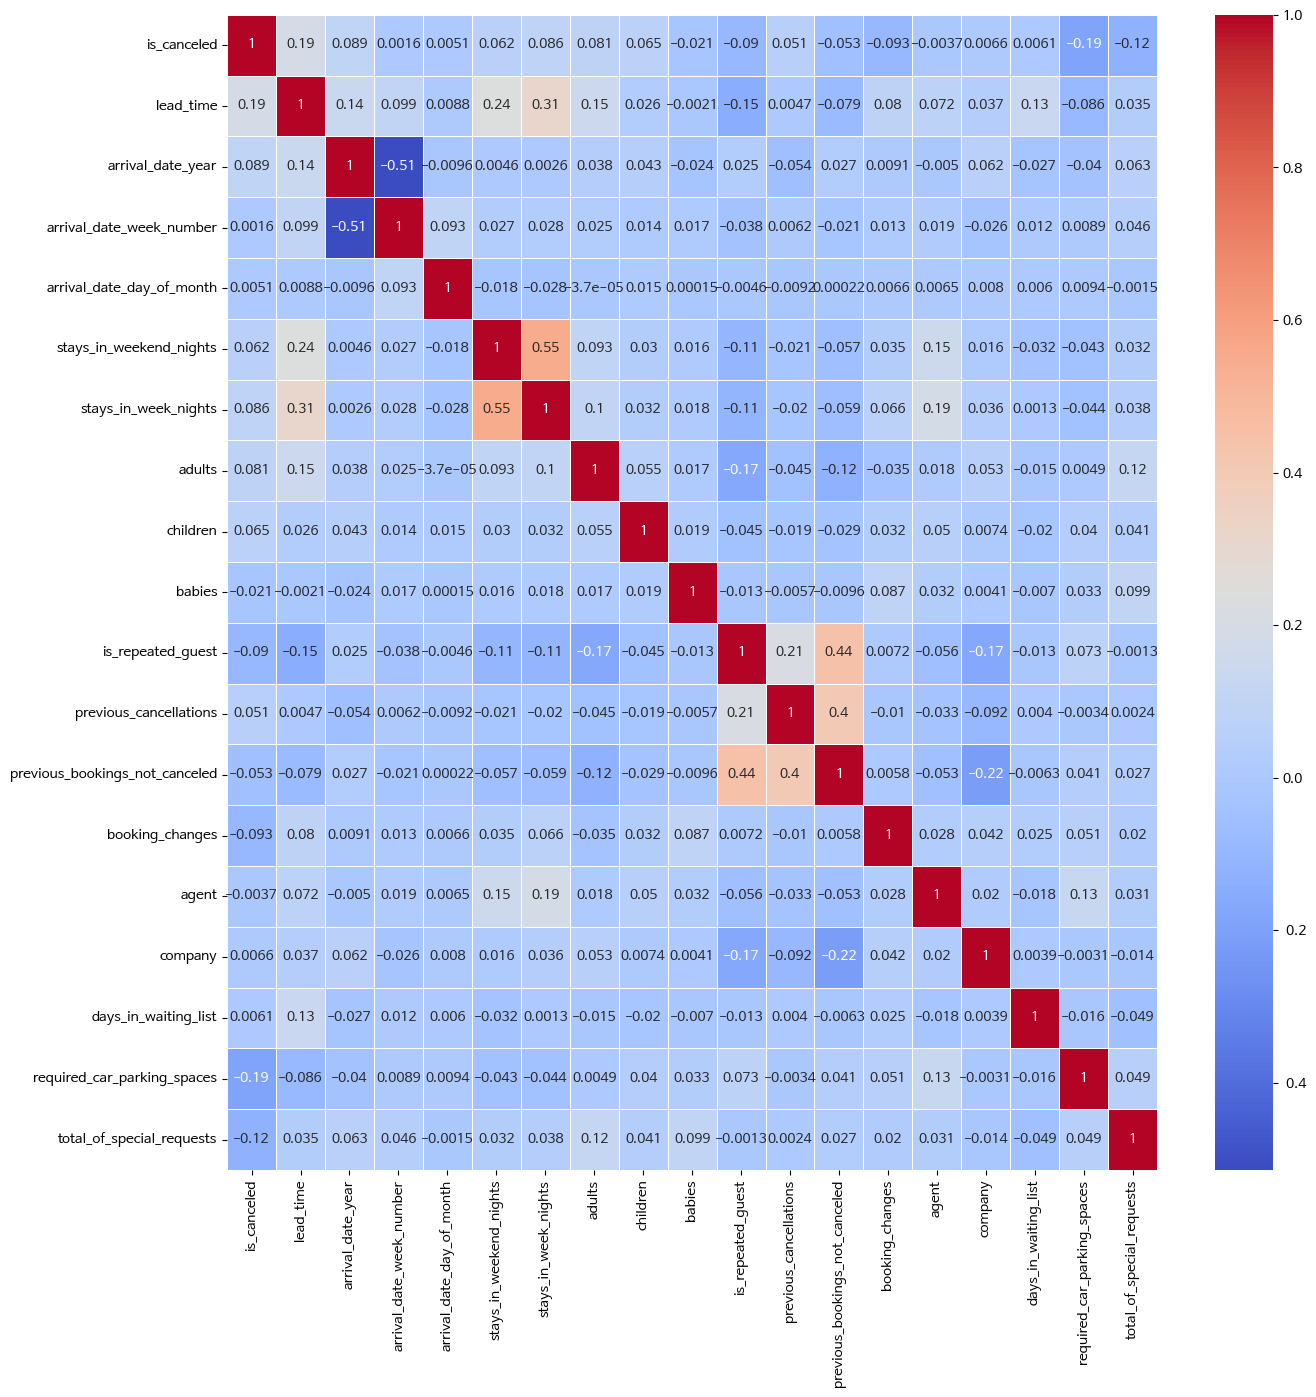

In [ ]:
corr = df_cleaned.select_dtypes(include="number").corr()        # 수치형 변수만 선택해서 상관관계

plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5)
plt.show()

---------------------------
## 가설 1 취소량이 높이 분포되어 있는 항목 데이분석

- df_cleaned 데이터는 전처리 작업이 마무리된 데이터이다
- df_canceled 데이터는 예약 취소항목만 모아둔 데이터이다.


In [ ]:
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,year_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,9.0,189.266735,0,0,0,Check-Out,2015-07-01,07,201507
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,9.0,189.266735,0,0,0,Check-Out,2015-07-01,07,201507
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,9.0,189.266735,0,0,0,Check-Out,2015-07-02,07,201507
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,304.0,189.266735,0,0,0,Check-Out,2015-07-02,07,201507
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,240.0,189.266735,0,0,1,Check-Out,2015-07-03,07,201507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,394.0,189.266735,0,0,0,Check-Out,2017-09-06,08,201708
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,9.0,189.266735,0,0,2,Check-Out,2017-09-07,08,201708
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,9.0,189.266735,0,0,4,Check-Out,2017-09-07,08,201708
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,89.0,189.266735,0,0,0,Check-Out,2017-09-07,08,201708


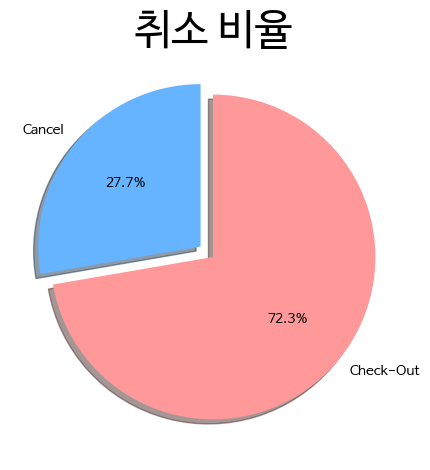

In [ ]:
df_cleaned_count = df_cleaned['is_canceled'].value_counts()

labels = ['Check-Out','Cancel']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0, 0.1)# 특정 값을 부각시키기 위해서

plt.pie(
    df_cleaned_count,
    labels = labels,
    colors = colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    counterclock=False
    )
plt.title('취소 비율', fontsize=30, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Resort Hotel 데이터만 추출
df_resort = df.query('hotel == "Resort Hotel"')
df_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,9.0,189.266735,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,9.0,189.266735,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,9.0,189.266735,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,189.266735,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,189.266735,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,A,A,1,143.0,189.266735,0,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,E,E,0,250.0,189.266735,0,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,E,E,0,250.0,189.266735,0,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,D,D,0,40.0,189.266735,0,0,1,Check-Out,2017-09-14


In [ ]:
# City Hotel 데이터만 추출
df_city = df.query('hotel == "City Hotel"')
df_city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,A,0,6.0,189.266735,0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,A,0,9.0,189.266735,0,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,A,0,9.0,189.266735,0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,A,0,9.0,189.266735,0,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,A,0,9.0,189.266735,0,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,394.0,189.266735,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,9.0,189.266735,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,9.0,189.266735,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,89.0,189.266735,0,0,0,Check-Out,2017-09-07


### 호텔별 취소율

In [ ]:
# 호텔별 예약 취소율 그래프

resort_canceled = df_resort[['is_canceled']]
city_canceled = df_city[['is_canceled']]

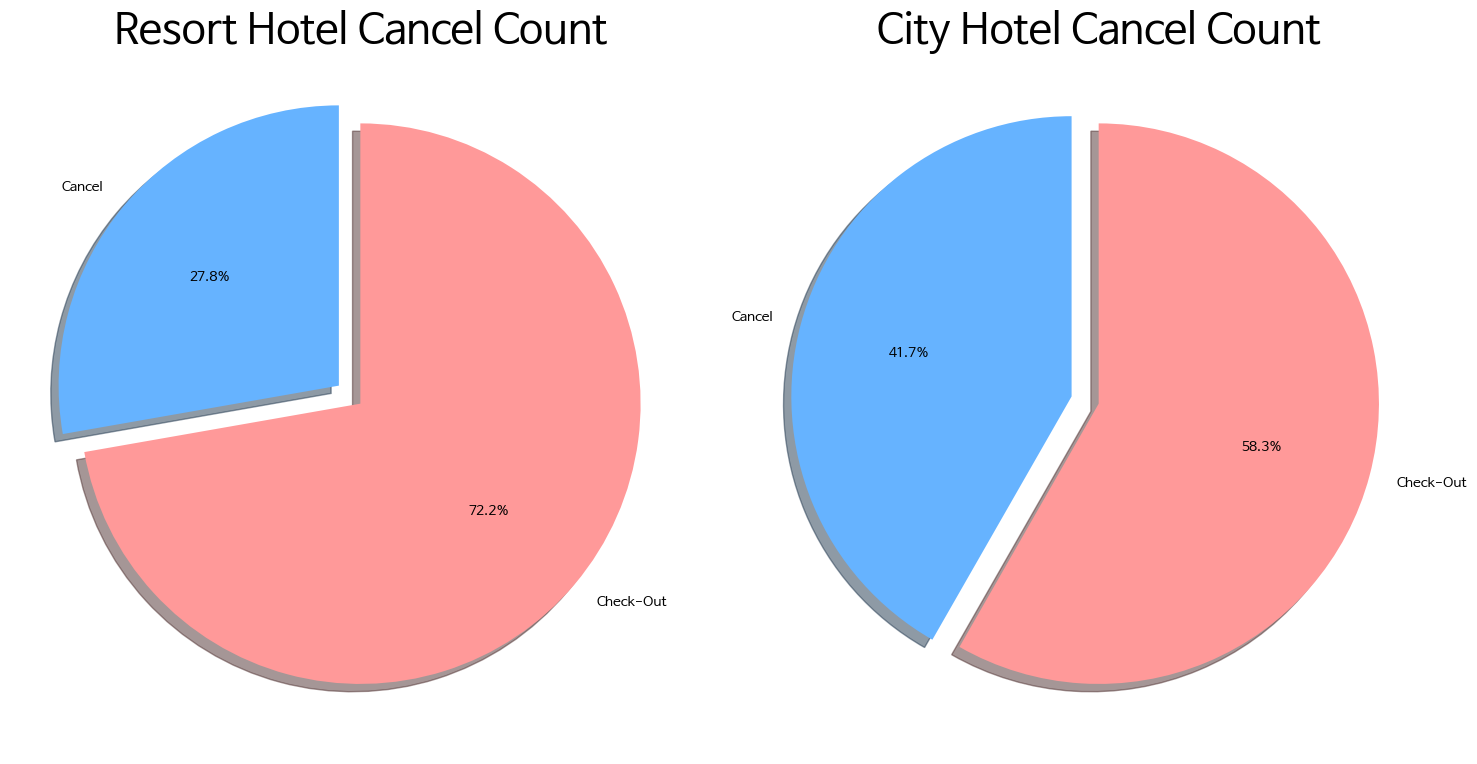

In [ ]:
# 호텔별 취소율

resort_cancel_counts = resort_canceled['is_canceled'].value_counts()
city_cancel_counts = city_canceled['is_canceled'].value_counts()

labels = ['Check-Out','Cancel']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0, 0.1)# 특정 값을 부각시키기 위해서

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.pie(
    resort_cancel_counts,
    labels = labels,
    colors = colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    counterclock=False
    )
plt.title('Resort Hotel Cancel Count', fontsize=30, fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(
    city_cancel_counts,
    labels = labels,
    colors = colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    counterclock=False
    )
plt.title('City Hotel Cancel Count', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

#### 💡 City 호텔이 Resort 호텔보다 예약 취소율이 높다

In [ ]:
df_resort.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,174.831702,193.318108,0.527758,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,115.247440,37.751145,7.428580,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,189.266735,0.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,189.266735,0.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,189.266735,0.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,535.000000,543.000000,185.000000,8.000000,5.00000


In [ ]:
df_city.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091365,0.004941,0.025615,0.079743,0.132371,0.187369,26.182466,187.220876,3.226774,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372168,0.084323,0.157983,0.415472,1.693411,0.608620,53.776354,27.436484,20.870890,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,189.266735,0.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,509.000000,497.000000,391.000000,3.000000,5.000000


In [ ]:
# company 코드별 취소 수치 - resort
df_resort_co = df_resort.query('is_canceled == 1')
df_resort_co['company'].value_counts()

,count
company,
189.266735,10715
223.000000,119
135.000000,19
281.000000,17
405.000000,17
...,...
337.000000,1
358.000000,1
99.000000,1


In [ ]:
# company 코드별 취소 수치 - city
df_city_co = df_city.query('is_canceled == 1')
df_city_co['company'].value_counts()

,count
company,
189.266735,32318
67.000000,175
40.000000,77
348.000000,59
153.000000,48
...,...
115.000000,1
46.000000,1
127.000000,1


#### 💡 City 의 경우 company 취소율이 resort 호텔에 비해 월등히 높다.

---------------------------
### 연도별 취소량

In [ ]:
# 연도별 취소 수치
df_canceled = df_cleaned.query('is_canceled == 1')
df_canceled['arrival_date_year'].value_counts()

,count
arrival_date_year,
2016,11083
2017,10054
2015,2670


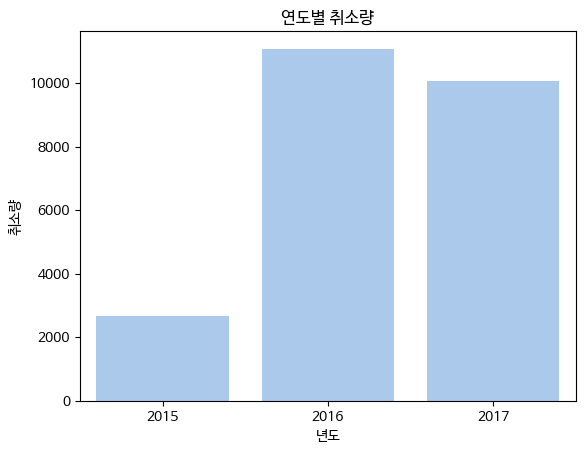

In [ ]:
# seaborn style - countplot 사용하여 연도별 취소량 시각화
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(data=df_canceled, x='arrival_date_year')
plt.title("연도별 취소량")
plt.xlabel("년도")
plt.ylabel("취소량")
plt.show()

---------------------------
### 월별 취소량

In [ ]:
# 월별 취소량 확인하기

df_canceled['year_month'].value_counts()

,count
year_month,
201708,1605
201707,1588
201705,1491
201706,1438
201608,1422
201704,1382
201610,1193
201607,1071
201609,1065


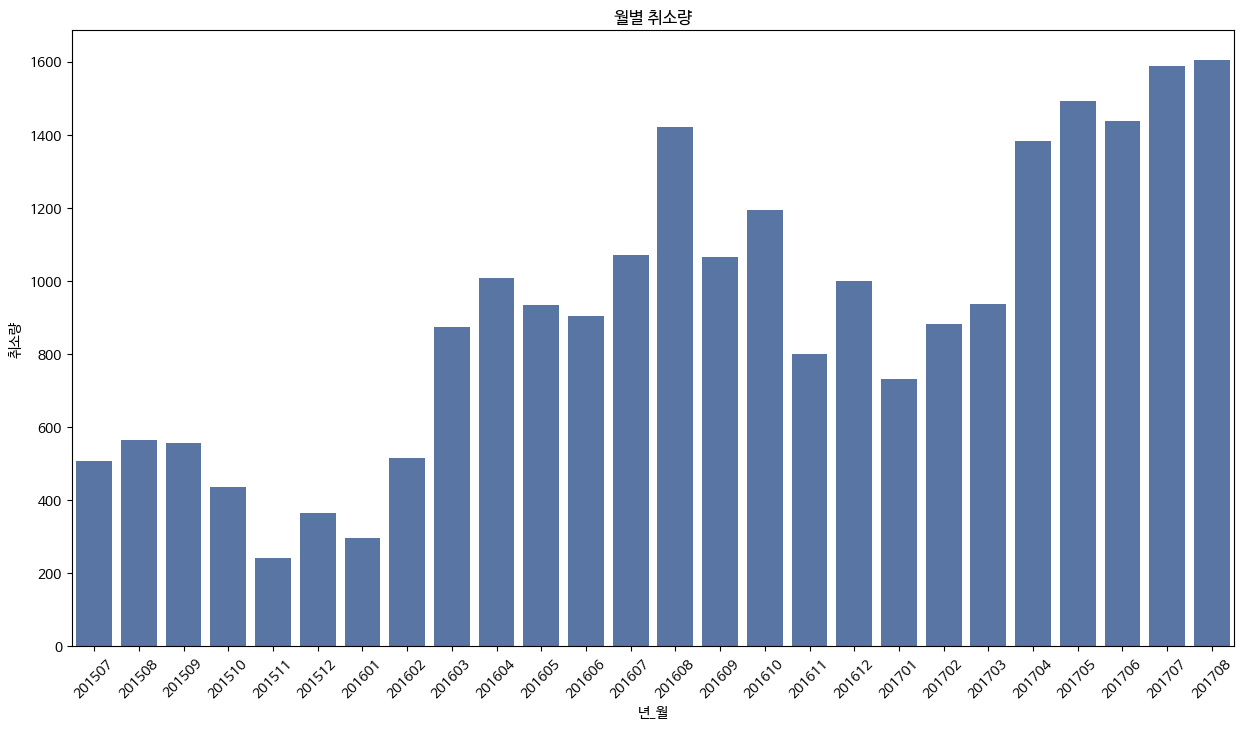

In [ ]:
# countplot 사용하여 연도별 취소량 시각화

plt.figure(figsize=(15,8))
sns.set_palette(sns.color_palette("deep"))
sns.countplot(data=df_canceled, x='year_month')
plt.title("월별 취소량")
plt.xlabel("년_월")
plt.ylabel("취소량")
plt.xticks(rotation=45)
plt.show()

#### 💡 7,8,9월의 취소율이 상승하는것을 알수 있다.

---------------------------
### 예약 플랫폼별 취소량

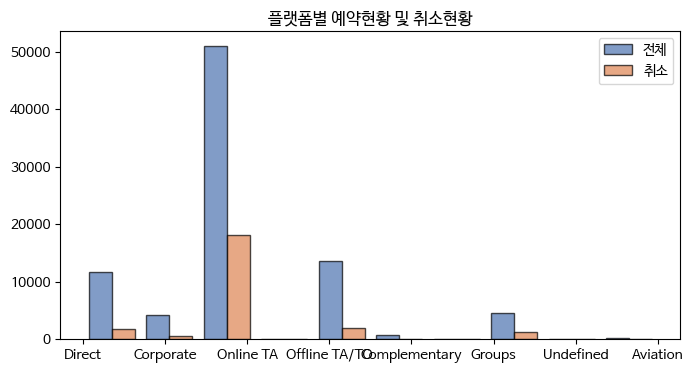

In [ ]:
# histpolt 이용하여 취소자 중에 예약업체 분석

plt.figure(figsize=(8,4))

plt.hist(
    [df_cleaned['market_segment'], df_canceled['market_segment']],
    label=['전체', '취소'],
    alpha=0.7,
    edgecolor='black',
    linewidth=1
    )

plt.legend()
plt.title("플랫폼별 예약현황 및 취소현황")
plt.show()

#### 💡 **온라인 예약자의 취소량이 압도적임을 알수 있다.**


---------------------------
## 가설 2 취소 고객의 특성 파악하기
- leadtime이 길면 취소율이 높아질 것이다.
- total of special requests가 있거나 많으면 취소율이 높아질 것이다.


<Axes: >

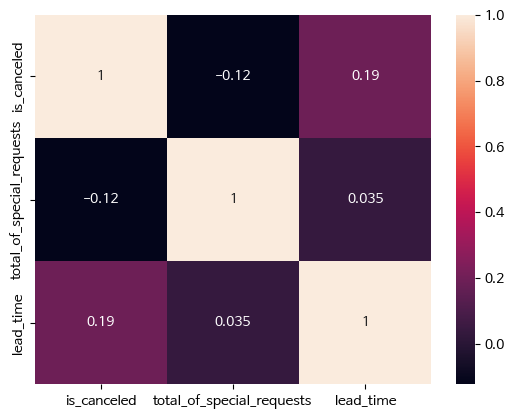

In [ ]:
# 변수간 상관관계 heatmap
sns.heatmap(df_cleaned[['is_canceled','total_of_special_requests','lead_time']].corr(), annot=True)

---------------------------
### Lead Time

In [ ]:
# 히트맵 참고하여 lead_time 예약 기간 대비 취소율 분석

df_cleaned.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000
mean,0.277093,79.168640,2016.211215,26.830243,15.810340,1.003224,2.620029,1.885343,0.135270,0.010848,0.039084,0.030355,0.186669,0.268084,82.202405,188.879740,0.729984,0.085059,0.700001
std,0.447565,85.395907,0.686969,13.670385,8.837025,1.027045,2.039445,0.617342,0.447301,0.109167,0.193797,0.361872,1.746033,0.711817,108.938160,32.104333,9.919843,0.282824,0.832332
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
75%,1.000000,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,189.266735,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,8.000000,5.000000


In [ ]:
# groupby를 통해 취소율 확인

df_cleaned.groupby('lead_time')['is_canceled'].mean()

,is_canceled
lead_time,
0,0.060099
1,0.066981
2,0.093897
3,0.098700
4,0.098456
...,...
622,1.000000
626,1.000000
629,1.000000


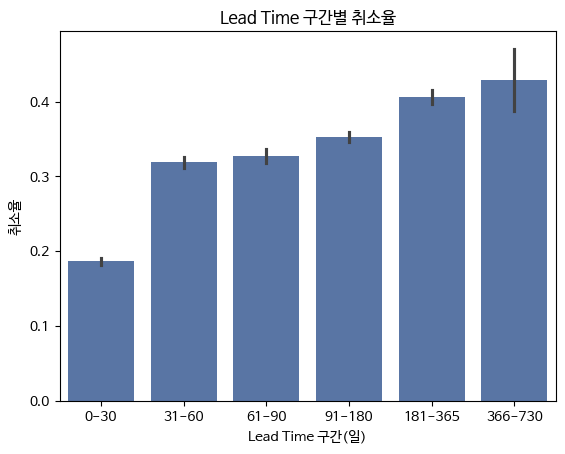

In [ ]:
# barplot 으로 lead_time 기준 취소율 보기 (X축 데이터가 너무 세밀하게 나와서 'lead_time_bin'으로 구간설정)

df_cleaned['lead_time_bin'] = pd.cut(df_cleaned['lead_time'], bins=[0, 30, 60, 90, 180, 365,730],
                                     labels=['0-30', '31-60', '61-90', '91-180', '181-365', '366-730'])

sns.barplot(data=df_cleaned, x='lead_time_bin', y='is_canceled')

plt.title('Lead Time 구간별 취소율')
plt.xlabel('Lead Time 구간(일)')
plt.ylabel('취소율')
plt.show()

#### 💡 위 그래프를 토대로 lead Time이 길어질 수록 취소율이 높아지는 것을 알수 있다.

---------------------------
### total of special requests

In [ ]:
# total of special requests 특별 요청 수 대비 취소율 분석

df_cleaned.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000,85917.000000
mean,0.277093,79.168640,2016.211215,26.830243,15.810340,1.003224,2.620029,1.885343,0.135270,0.010848,0.039084,0.030355,0.186669,0.268084,82.202405,188.879740,0.729984,0.085059,0.700001
std,0.447565,85.395907,0.686969,13.670385,8.837025,1.027045,2.039445,0.617342,0.447301,0.109167,0.193797,0.361872,1.746033,0.711817,108.938160,32.104333,9.919843,0.282824,0.832332
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,0.000000,0.000000
75%,1.000000,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,189.266735,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,8.000000,5.000000


In [ ]:
# groupby를 통해 취소율 확인

df_cleaned.groupby('total_of_special_requests')['is_canceled'].mean()

,is_canceled
total_of_special_requests,
0,0.335717
1,0.225357
2,0.213519
3,0.169440
4,0.108280
5,0.055556


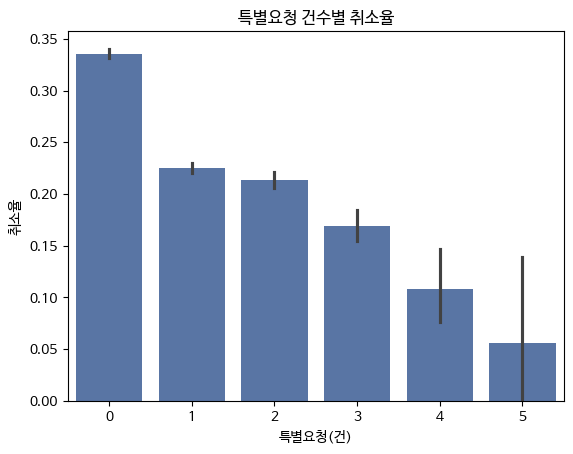

In [ ]:
# barplot 으로 total_of_special_requests 기준 취소율 보기

sns.barplot(data=df_cleaned, x='total_of_special_requests', y='is_canceled')

plt.title('특별요청 건수별 취소율')
plt.xlabel('특별요청(건)')
plt.ylabel('취소율')
plt.show()

#### 💡 해당 그래프로는 특별요청을 하지 않은 값에서 취소율이 높게 보인다. 단, 1건이라도 요청 한 건을 합계로 본다면 데이터가 어떨까?

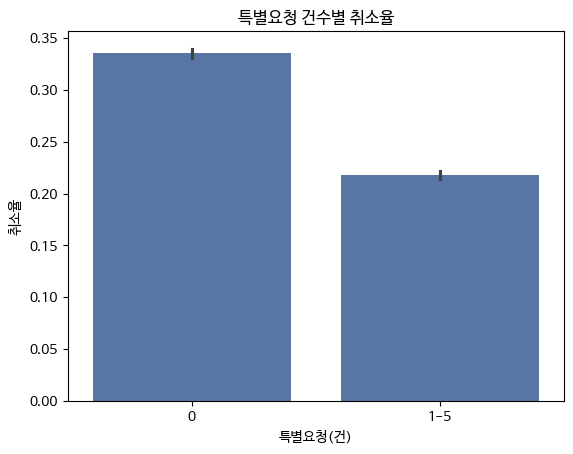

In [ ]:
# 위 그래프와 같은 데이터를 사용하나 bins를 통해 0과 1-5 구간을 나눠 비교해본다

df_cleaned['requests_bin'] = pd.cut(df_cleaned['total_of_special_requests'], bins=[-0.1, 0.5, 5.1],
                                     labels=['0', '1-5'])

sns.barplot(data=df_cleaned, x='requests_bin', y='is_canceled')

plt.title('특별요청 건수별 취소율')
plt.xlabel('특별요청(건)')
plt.ylabel('취소율')
plt.show()

특별 요청을 1건이라도 한 그룹과 하지 않은 그룹으로 비교해 보았을때도 역시나 특별 요청이 없는 건수가 취소율이 높아 보인다.

즉 해당 데이터로 가설을 세운것은 맞지가 않다.

---------------------
## 가설 3 취소율이 낮은 데이터 살피기
- is_repeated_guest 재방문 고객은 취소율이 낮을 것이다.
- 유아 및 어린이 동반이 있으면 취소할 확율이 낮지 않을까?

<Axes: >

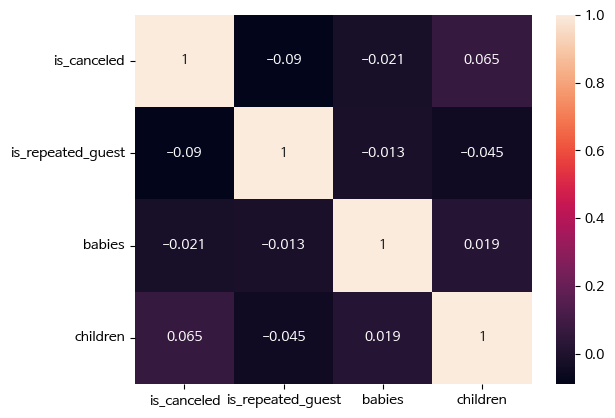

In [ ]:
# 변수간 상관관계 heatmap
sns.heatmap(df_cleaned[['is_canceled','is_repeated_guest','babies','children']].corr(), annot=True)

---------------------------
### is repeated guest

In [ ]:
# groupby를 통해 취소율 확인

df_cleaned.groupby('is_repeated_guest')['is_canceled'].mean()

,is_canceled
is_repeated_guest,
0,0.285202
1,0.077725


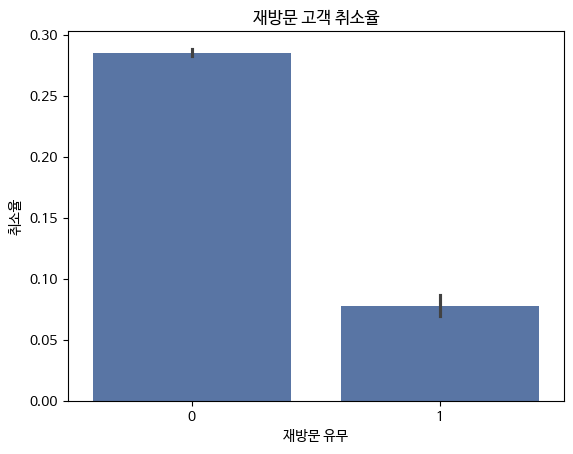

In [ ]:
# barplot 으로 total_of_special_requests 기준 취소율 보기

sns.barplot(data=df_cleaned, x='is_repeated_guest', y='is_canceled')

plt.title('재방문 고객 취소율')
plt.xlabel('재방문 유무')
plt.ylabel('취소율')
plt.show()

#### 💡 재방문 고객의 경우 한번도 방문하지 않은 고객 대비 취소율이 현저히 낮을 것을 확인 할수 있다.

### babies | children



In [ ]:
# groupby를 통해 취소율 확인

df_cleaned.groupby('babies',)['is_canceled'].mean()

,is_canceled
babies,
0,0.278103
1,0.183651
2,0.133333
9,0.000000


In [ ]:
df_cleaned.groupby('children',)['is_canceled'].mean()

,is_canceled
children,
0.0,0.268775
1.0,0.312366
2.0,0.421255
3.0,0.203125


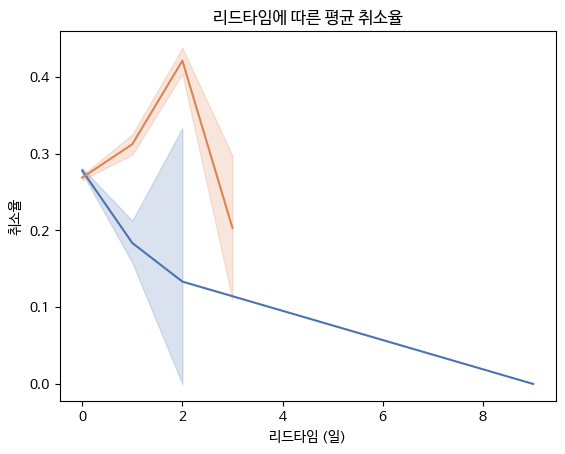

In [ ]:
# lineplot을 통해 column별 취소율 시각화

sns.lineplot(data=df_cleaned, x='babies', y='is_canceled')
sns.lineplot(data=df_cleaned, x='children', y='is_canceled')

plt.title("리드타임에 따른 평균 취소율")
plt.xlabel("리드타임 (일)")
plt.ylabel("취소율")
plt.show()

#### 💡 가설만큼 명확한 수치하고 판단되지 않는다.

--------------
## 기타 데이터 시각화

In [ ]:
# meal 종류별 취소율

df_cleaned.groupby('meal',)['is_canceled'].mean()

,is_canceled
meal,
BB,0.266875
FB,0.276056
HB,0.274941
SC,0.357663
Undefined,0.171247


---------------------
# 🏃‍♂️Action Plans

1. 취소율에 분석
    
    - city 호텔의 취소율이 높은이유는 company 예약으로 확인된다.
    - 호텔과 연계되어 있는 회사정보를 파악하여 관련 담당자와 소통한다.
    - resort 호텔의 경우 agent 분석결과 온라인 예약이 취소율이 높다.
    - 전체 취소율을 보았을때 7, 8, 9월의 취소율이 높은 것을 알수 있다.
    - leadtime이 길어질수록 취소율이 높아진다.
    - 재방문 고객의 경우 취소율이 낮다.

2. 취소율을 줄이기 위한 대안

    - city 호텔의 경우 연계되어 있는 company의 취소사유를 분석하고 취소형태가 어떻게 이루어지는지 파악한다.
        - company 내부적이슈인지 외부적이슈인지 파악하고, 예약의 형태를 변경 및 조절할수 있도록 한다.

    - 두 호텔 모두 온라인 예약의 취소율이 상당하다. 관련 대안으로는 온라인 판매상품에 대한 분석을 통해 패키지 구성 상품들로 고객 접근성을 높이는 방안을 모색한다.

    - leadtime이 길어 취소율이 높아지는 경우 예약 가능 일자에 대한 시스템을 수정하여 1년 ~1년 6개월 정도의 기간으로 변경하고 짧은 leadtime에 구매할수 있는 시즌별 이벤트를 통하여 대안한다.

# 멘토평

데이터 전처리 부분에서 만점을 받으신 점이 인상적입니다. 결측치 처리에서 children, country, agent, company 등의 변수들을 각각의 특성에 맞게 적절히 처리하셨고, 최빈값과 평균값 처리 방법을 상황에 따라 유연하게 선택한 점이 우수했습니다. 특히 주목할 만한 점은 이상치 처리 과정에서 보여준 논리적 사고입니다. 성인이 0명인데 어린이나 아기가 있는 경우를 논리적으로 불가능한 데이터로 판단하여 제거한 것은 단순히 통계적 기법만 적용하는 것이 아니라 비즈니스 상식을 바탕으로 한 합리적인 의사결정이었습니다. 또한 children과 babies의 최댓값이 10인 경우를 데이터 수가 적다는 판단 하에 제거한 결정도 타당했습니다.

탐색적 데이터 분석에서는 체계적으로 3개의 가설을 설정하고 이를 검증하는 과정이 매우 논리적이었습니다. 호텔별, 연도별, 월별, 플랫폼별로 취소량이 높은 항목을 분석한 첫 번째 가설부터 리드타임과 특별요청의 취소율 관계를 살펴본 두 번째 가설, 그리고 재방문 고객과 유아동반의 취소율 관계를 분석한 세 번째 가설까지 모두 의미 있는 접근이었습니다. 시각화 측면에서도 파이차트, 막대그래프, 히트맵, 라인플롯 등 다양한 기법을 활용하셨고, 한글 폰트 설정으로 가독성을 높인 점도 좋았습니다.

다만 몇 가지 개선이 필요한 부분도 있었습니다. 인사이트 도출 과정에서 City Hotel이 Resort Hotel보다 취소율이 높고, 온라인 예약의 취소율이 높다는 핵심 발견사항들은 잘 정리하셨지만, 일부 분석 결과에 대한 깊이 있는 해석이 부족했습니다. 예를 들어, 특별요청과 취소율의 관계에서 "가설이 맞지 않다"고 결론을 내렸는데, 왜 그런 결과가 나왔는지에 대한 심층적인 분석이 있었다면 더 좋았을 것입니다. 호텔별로 나누어 특별요청의 효과를 분석하거나, 가족여행과 비가족여행의 취소 패턴을 비교 분석하는 등의 추가적인 접근이 가능했을 것입니다.

액션 플랜 부분에서는 Company 취소사유 분석 및 예약 형태 조절, 온라인 예약 패키지 상품 구성, 리드타임 기간 조절 등 구체적인 개선안을 제시하신 점은 좋았으나, 일부 제안이 구체성이 부족했습니다. 예를 들어 "온라인 판매상품에 대한 분석을 통해 패키지 구성"이라는 제안보다는 "온라인 예약 취소율을 현재 50%에서 35%로 감소시키는 것을 목표로, 숙박+식사+액티비티 패키지 상품 3종을 출시"와 같이 정량적 목표와 구체적 실행 방법을 제시했다면 더 실행 가능한 액션 플랜이 되었을 것입니다.

앞으로의 학습 방향으로는 통계적 검증 방법을 보완하시길 권합니다. 상관관계 분석에서 p-value를 확인하거나 집단 간 차이의 통계적 유의성을 검증하는 등의 방법을 추가하면 분석의 신뢰도를 더욱 높일 수 있을 것입니다. 또한 데이터 패턴의 비즈니스적 원인을 더 깊이 있게 분석하는 능력을 기르시면, 예를 들어 왜 City Hotel의 취소율이 높은지에 대한 비즈니스적 해석이나 계절성 패턴이 가지는 비즈니스적 의미를 더 풍부하게 설명할 수 있을 것입니다.

전반적으로 이번 미션을 통해 데이터 전처리부터 인사이트 도출까지 전 과정을 성공적으로 완수하셨으며, 특히 실무진이 활용할 수 있는 관점에서 접근한 점이 매우 인상적이었습니다. 논리적 데이터 정제, 시계열 분석을 위한 데이터 구조화, 다각도 분석 등 여러 면에서 우수한 역량을 보여주셨습니다. 약간의 심층 분석과 통계적 검증만 보완하신다면 완벽한 데이터 분석 프로젝트가 될 것으로 기대됩니다.